In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [4]:
data = pd.read_parquet('../data/processed/PurpleAir daily individual.parquet')[['Channel A PM2.5 (ug/m3)']]

In [9]:
data_by_sensor = data.reset_index()
data_by_sensor['created_at'] = data_by_sensor['created_at'].dt.strftime('%m-%d')
data_by_sensor=data_by_sensor.pivot(index='created_at',columns='sensor_name', values='Channel A PM2.5 (ug/m3)')

<Figure size 720x720 with 0 Axes>

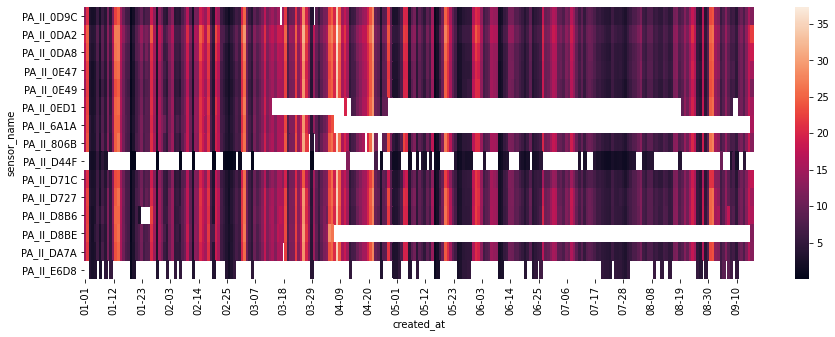

In [14]:
sns.heatmap(data_by_sensor.T)
fig = plt.gcf()
fig.set_size_inches(15,5)

In [19]:
data

Channel A PM2.5 (ug/m3)
sensor_name created_at                                        
PA_II_0D9C  2019-12-31 00:00:00-06:00                12.271173
            2020-01-01 00:00:00-06:00                13.821972
            2020-01-02 00:00:00-06:00                20.649250
            2020-01-03 00:00:00-06:00                 2.978492
            2020-01-04 00:00:00-06:00                 2.262434
...                                                        ...
PA_II_E6D8  2020-09-04 00:00:00-05:00                 6.403319
            2020-09-05 00:00:00-05:00                 8.936028
            2020-09-07 00:00:00-05:00                 8.835569
            2020-09-08 00:00:00-05:00                 6.421599
            2020-09-10 00:00:00-05:00                 4.734222

[3046 rows x 1 columns]

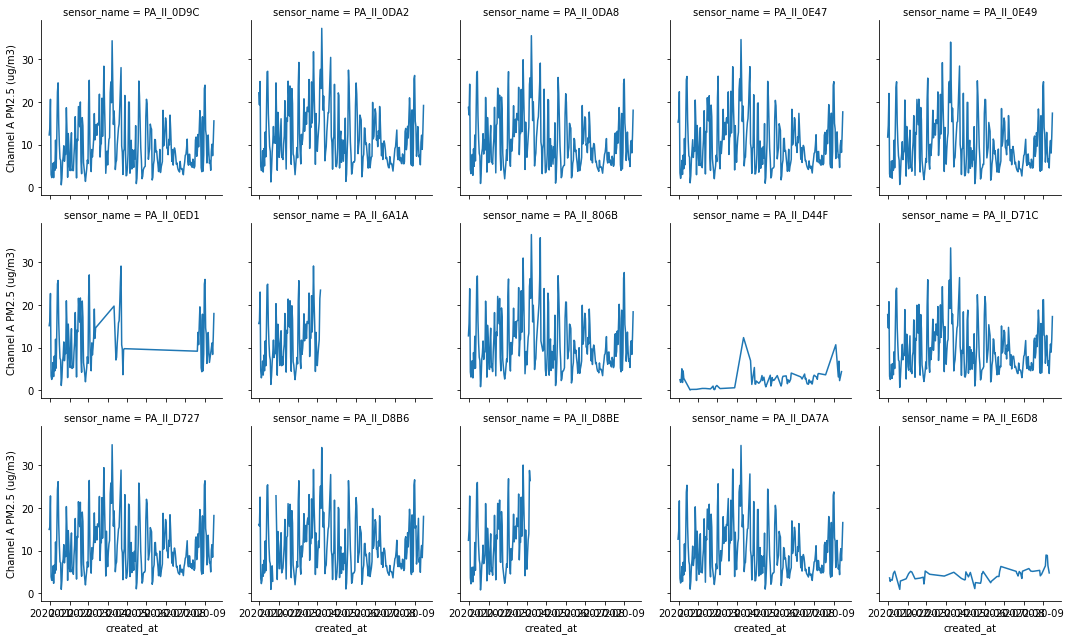

In [20]:
def scatter_facet_grid(data,x_col='created_at',y_col='Channel A PM2.5 (ug/m3)', bound=7000):
    #data = data.loc[(data[y_col]<bound) &(data[x_col]<bound)]
    g = sns.FacetGrid(data.reset_index(), col="sensor_name", palette=['blue','red'], col_wrap=5)
    g.map(sns.lineplot,x_col,y_col)
    
scatter_facet_grid(data)